# Bird Distributions

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
birds = pd.read_csv('birds.csv')
birds.head()

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
0,Black-bellied whistling-duck,Dendrocygna autumnalis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,47.0,56.0,652.0,1020.0,76.0,94.0
1,Fulvous whistling-duck,Dendrocygna bicolor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,45.0,53.0,712.0,1050.0,85.0,93.0
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0
3,Ross's goose,Anser rossii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,57.3,64.0,1066.0,1567.0,113.0,116.0
4,Greater white-fronted goose,Anser albifrons,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,81.0,1930.0,3310.0,130.0,165.0


Quickly look at the way data is distributed by using a scatter plot as we did in the previous lesson:



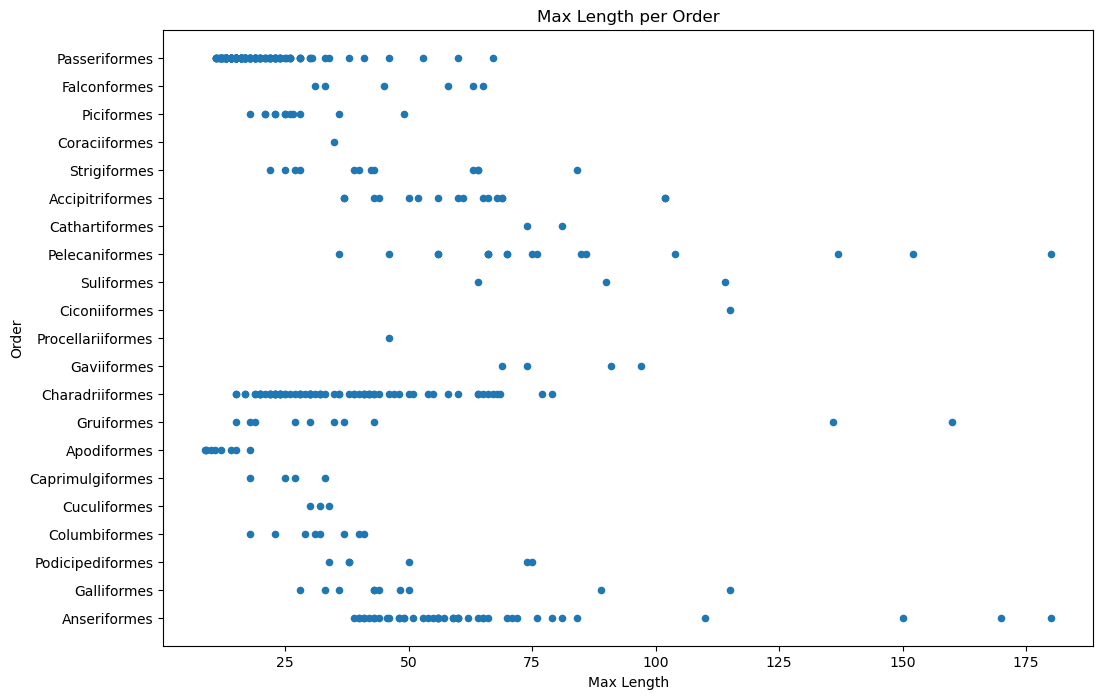

In [2]:
birds.plot(kind='scatter',x='MaxLength',y='Order',figsize=(12,8))
plt.title('Max Length per Order')
plt.ylabel("Order")
plt.xlabel('Max Length')
plt.show()

This gives an overview of the general distribution of body length per bird Order, but it is not the optimal way to display true distributions. That task is usually handled by creating a Histogram.



## Working with histograms

Matplotlib offers very good ways to visualize data distribution using Histograms. This type of chart is like a bar chart where the distribution can be seen via a rise and fall of the bars. To build a histogram, you need numeric data. To build a Histogram, you can plot a chart defining the kind as 'hist' for Histogram. This chart shows the distribution of MaxBodyMass for the entire dataset's range of numeric data. By dividing the array of data it is given into smaller bins, it can display the distribution of the data's values:



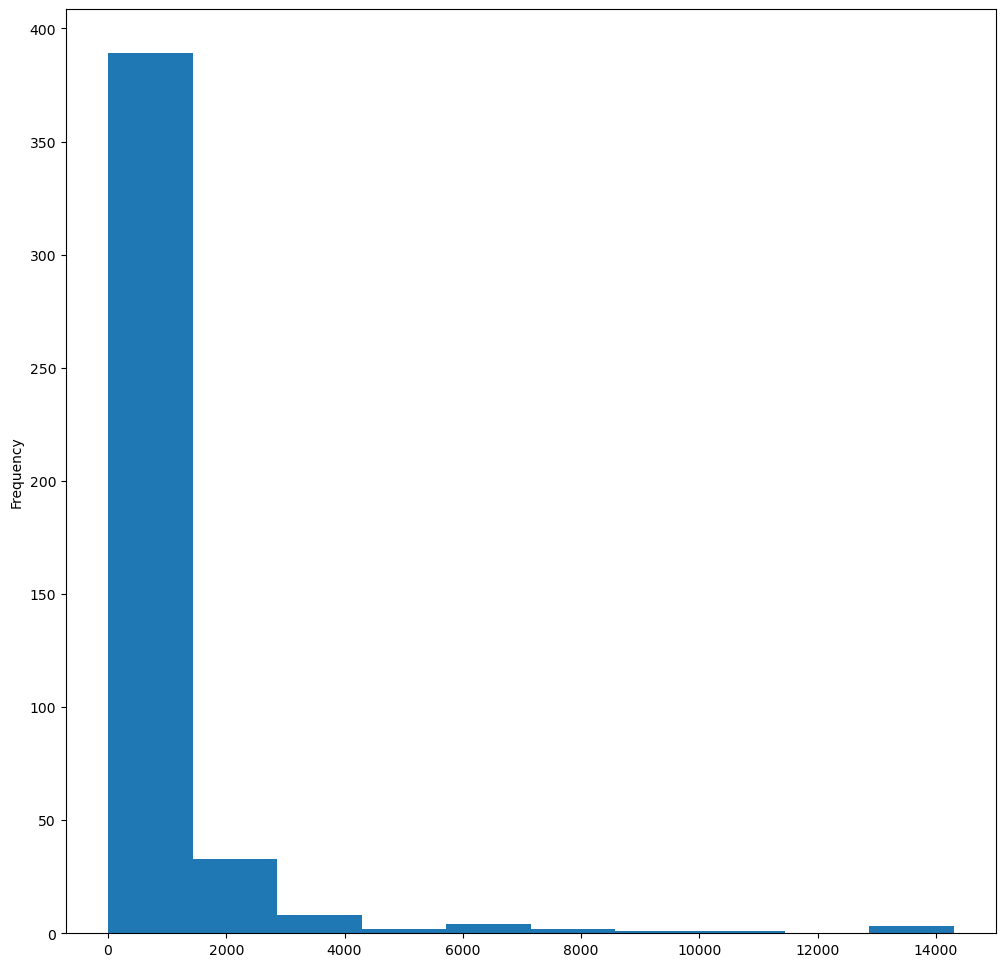

In [3]:
birds['MaxBodyMass'].plot(kind = 'hist', bins = 10, figsize = (12,12))
plt.show()

As you can see, most of the 400+ birds in this dataset fall in the range of under 2000 for their Max Body Mass. 

Gain more insight into the data by changing the bins parameter to a higher number, something like 30:

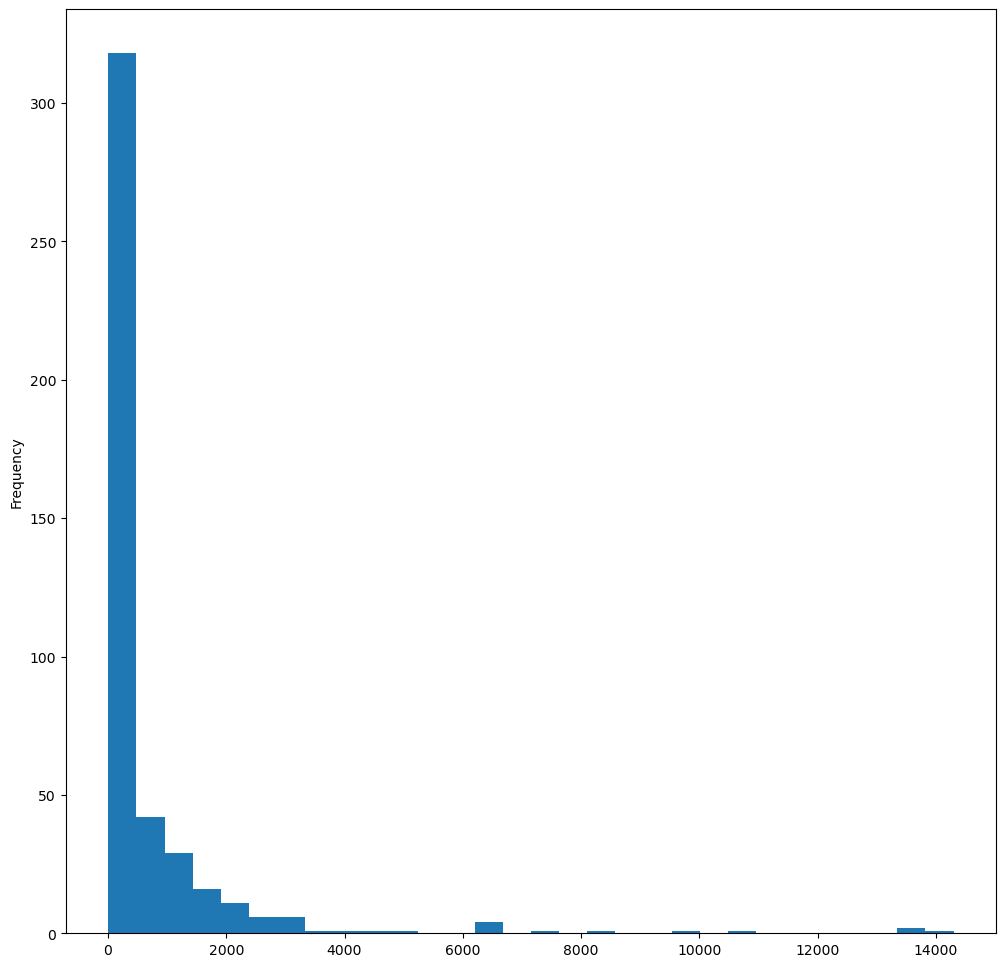

In [4]:
birds['MaxBodyMass'].plot(kind = 'hist', bins = 30, figsize = (12,12))
plt.show()

This chart shows the distribution in a bit more granular fashion. A chart less skewed to the left could be created by ensuring that you only select data within a given range:


Filter your data to get only those birds whose body mass is under 60, and show 40 bins:



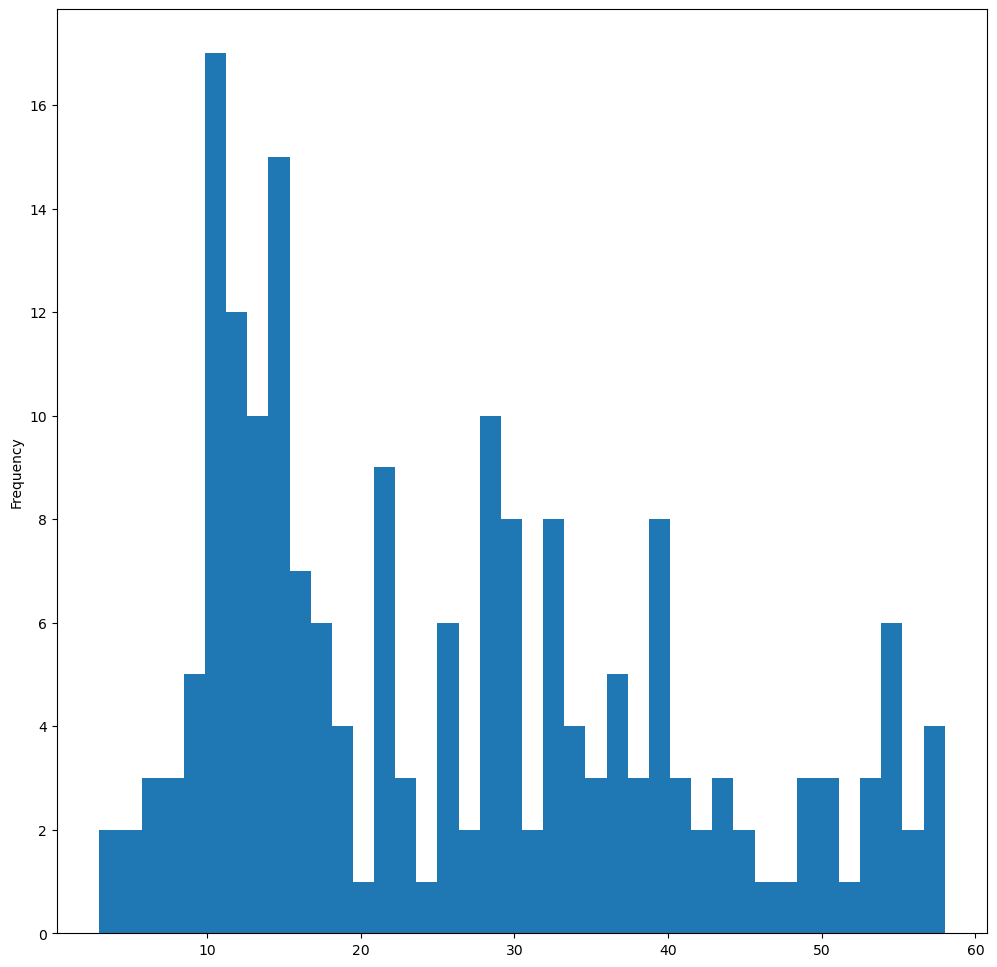

In [7]:
filteredBirds = birds[(birds['MaxBodyMass'] > 1) & (birds['MaxBodyMass'] < 60)]
filteredBirds['MaxBodyMass'].plot(kind='hist',bins=40,figsize=(12,12))
plt.show()

Try some other filters and data points. 

To see the full distribution of the data, remove the ['MaxBodyMass'] filter to show labeled distributions.



[]

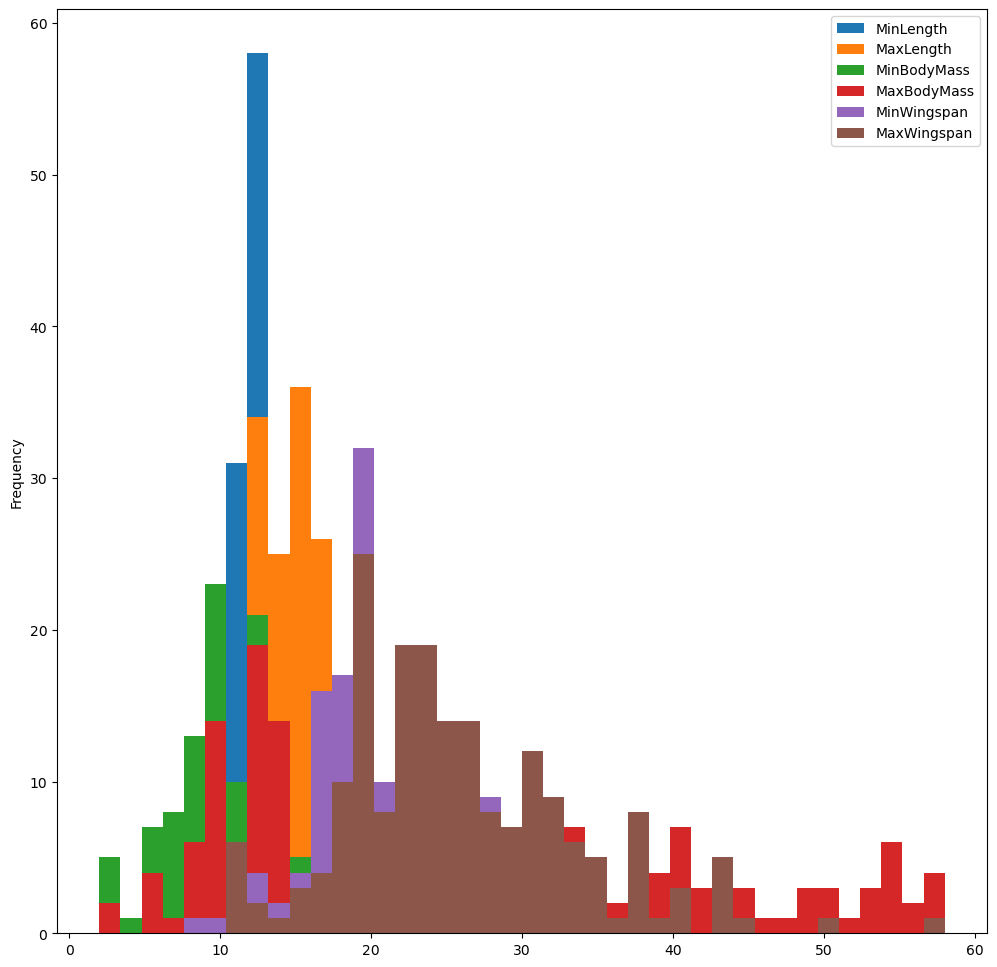

In [8]:
filteredBirds.plot(kind='hist',bins=40,figsize=(12,12))
plt.plot()

<AxesSubplot: ylabel='Frequency'>

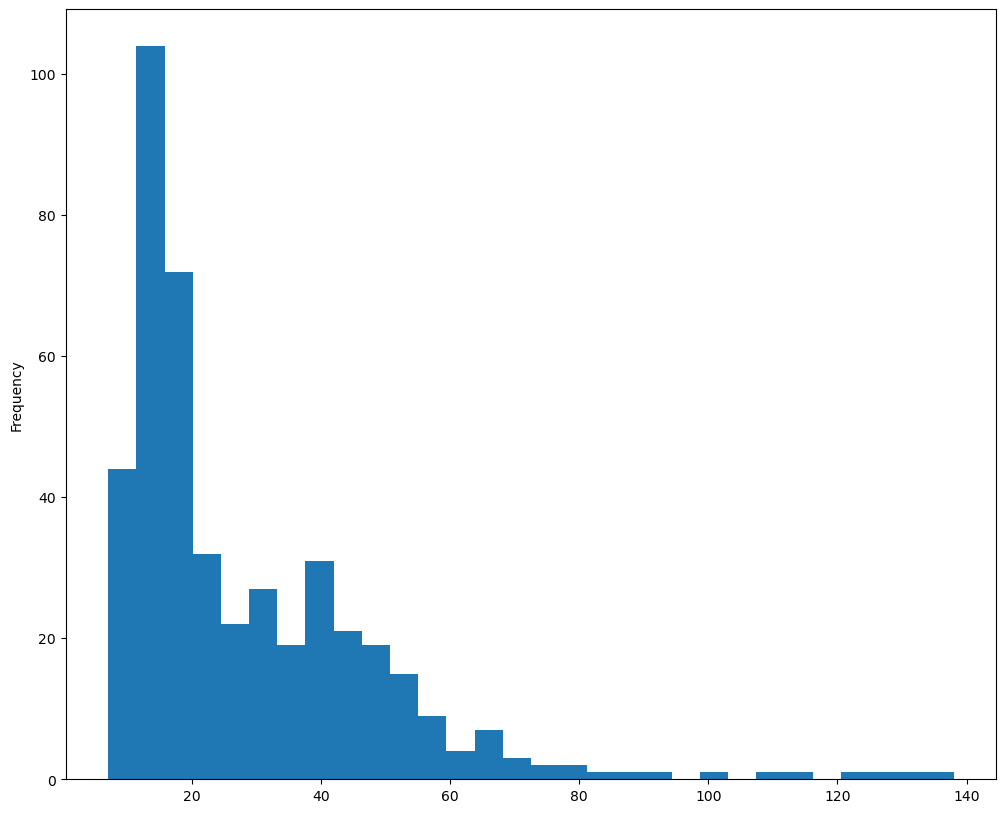

In [11]:
birds['MinLength'].plot(kind='hist',bins=30,figsize=(12,10))



The histogram offers some nice color and labeling enhancements to try as well:


Create a 2D histogram to compare the relationship between two distributions. Let's compare MaxBodyMass vs. MaxLength. Matplotlib offers a built-in way to show convergence using brighter colors:



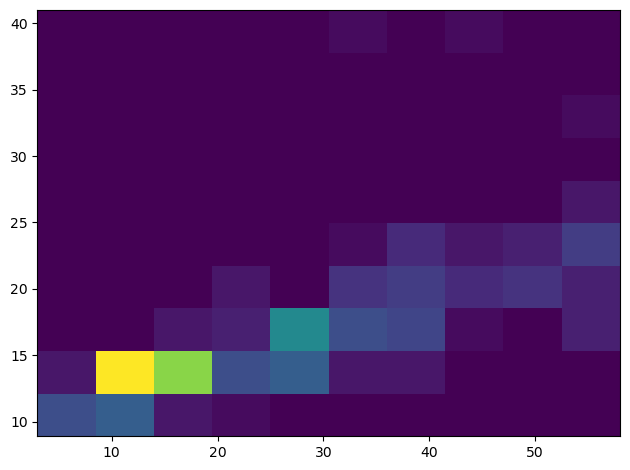

In [13]:
x = filteredBirds['MaxBodyMass']
y = filteredBirds['MaxLength']
fig,ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(x,y)

There appears to be an expected correlation between these two elements along an expected axis, with one particularly strong point of convergence

Histograms work well by default for numeric data.

What if you need to see distributions according to text data?

Explore the dataset for distributions using text data

This dataset also includes good information about the bird category and its genus, species, and family as well as its conservation status. Let's dig into this conservation information. 

What is the distribution of the birds according to their conservation status?

In the dataset, several acronyms are used to describe conservation status. 

These acronyms come from the IUCN Red List Categories, an organization that catalogs species' status.

- CR: Critically Endangered
- EN: Endangered
- EX: Extinct
- LC: Least Concern
- NT: Near Threatened
- VU: Vulnerable

These are text-based values so you will need to do a transform to create a histogram. 

Using the filteredBirds dataframe, display its conservation status alongside its Minimum Wingspan. What do you see?

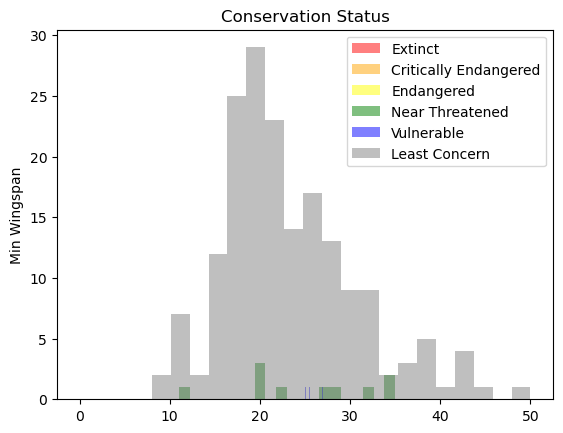

In [14]:
x1 = filteredBirds.loc[filteredBirds.ConservationStatus=='EX', 'MinWingspan']
x2 = filteredBirds.loc[filteredBirds.ConservationStatus=='CR', 'MinWingspan']
x3 = filteredBirds.loc[filteredBirds.ConservationStatus=='EN', 'MinWingspan']
x4 = filteredBirds.loc[filteredBirds.ConservationStatus=='NT', 'MinWingspan']
x5 = filteredBirds.loc[filteredBirds.ConservationStatus=='VU', 'MinWingspan']
x6 = filteredBirds.loc[filteredBirds.ConservationStatus=='LC', 'MinWingspan']

kwargs = dict(alpha=0.5, bins=20)

plt.hist(x1, **kwargs, color='red', label='Extinct')
plt.hist(x2, **kwargs, color='orange', label='Critically Endangered')
plt.hist(x3, **kwargs, color='yellow', label='Endangered')
plt.hist(x4, **kwargs, color='green', label='Near Threatened')
plt.hist(x5, **kwargs, color='blue', label='Vulnerable')
plt.hist(x6, **kwargs, color='gray', label='Least Concern')

plt.gca().set(title='Conservation Status', ylabel='Min Wingspan')
plt.legend()

There doesn't seem to be a good correlation between minimum wingspan and conservation status. Test other elements of the dataset using this method. You can try different filters as well. Do you find any correlation?

## Density plots

You may have noticed that the histograms we have looked at so far are 'stepped' and do not flow smoothly in an arc. To show a smoother density chart, you can try a density plot.

To work with density plots, familiarize yourself with a new plotting library, Seaborn.

Loading Seaborn, try a basic density plot:



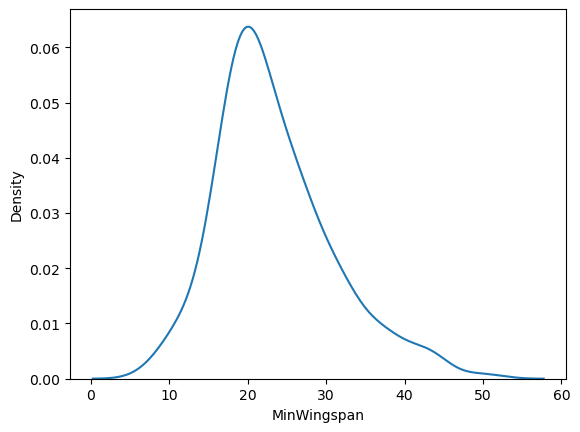

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(filteredBirds['MinWingspan'])
plt.show()

You can see how the plot echoes the previous one for Minimum Wingspan data; it's just a bit smoother. According to Seaborn's documentation, "Relative to a histogram, KDE can produce a plot that is less cluttered and more interpretable, especially when drawing multiple distributions. But it has the potential to introduce distortions if the underlying distribution is bounded or not smooth. Like a histogram, the quality of the representation also depends on the selection of good smoothing parameters." source In other words, outliers as always will make your charts behave badly.

If you wanted to revisit that jagged MaxBodyMass line in the second chart you built, you could smooth it out very well by recreating it using this method:

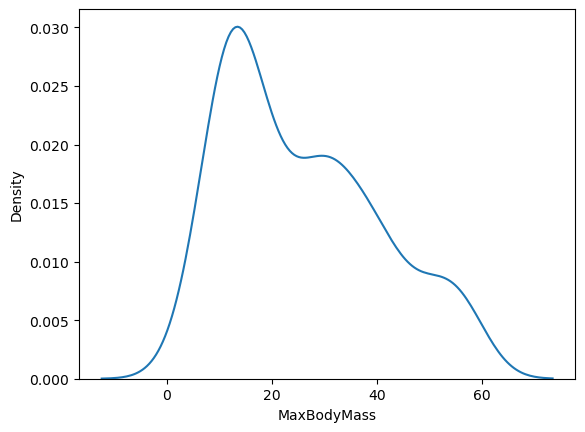

In [16]:
sns.kdeplot(filteredBirds['MaxBodyMass'])
plt.show()

If you wanted a smooth, but not too smooth line, edit the bw_adjust parameter:

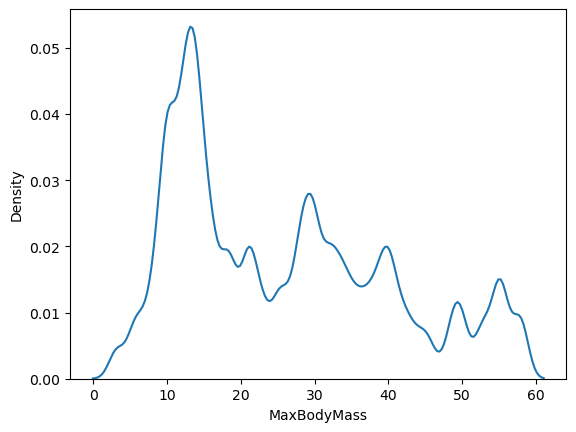

In [17]:
sns.kdeplot(filteredBirds['MaxBodyMass'],bw_adjust=.2)
plt.show()